# Advertising Spend vs Sales: Exploring Bias, Variance, and Model Fitting

This notebook demonstrates the concepts of **underfitting**, **overfitting**, and the **bias-variance tradeoff** using a synthetic dataset of advertising spend and sales.  

- The dataset shows **sales increasing with advertising spend**, then **plateauing** at high spending levels.  
- We will fit **polynomial regression models of different degrees** to visualize:  
  - **Underfitting (high bias)**  
  - **Optimal fit (low bias, low variance)**  
  - **Overfitting (high variance)**  

We will also compare predictions on the **training set** and **test set** side-by-side.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [14]:
def plot_train_test_polynomial_with_error(X_train, y_train, X_test, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    model = LinearRegression().fit(X_poly_train, y_train)

    # Prediction for plotting
    X_range = np.linspace(5, 150, 300).reshape(-1, 1)
    y_range = model.predict(poly.transform(X_range))

    # Predictions on train and test for errors
    y_train_pred = model.predict(X_poly_train)
    X_poly_test = poly.transform(X_test)
    y_test_pred = model.predict(X_poly_test)

    # Calculate MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    print(f"Degree {degree} - Train MSE: {mse_train:.3f}, RMSE: {rmse_train:.3f}")
    print(f"Degree {degree} - Test MSE:  {mse_test:.3f}, RMSE:  {rmse_test:.3f}\n")

    # -------- Plotting --------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].scatter(X_train, y_train, color='blue', label='Train Data')
    axes[0].plot(X_range, y_range, color='green', label=f'Degree {degree}')
    axes[0].set_title(f'Train Data - Polynomial Degree {degree}')
    axes[0].set_xlabel('Advertising Spend (k$)')
    axes[0].set_ylabel('Sales (k units)')
    axes[0].legend()

    axes[1].scatter(X_test, y_test, color='red', label='Test Data')
    axes[1].plot(X_range, y_range, color='green', label=f'Degree {degree}')
    axes[1].set_title(f'Test Data - Polynomial Degree {degree}')
    axes[1].set_xlabel('Advertising Spend (k$)')
    axes[1].set_ylabel('Sales (k units)')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


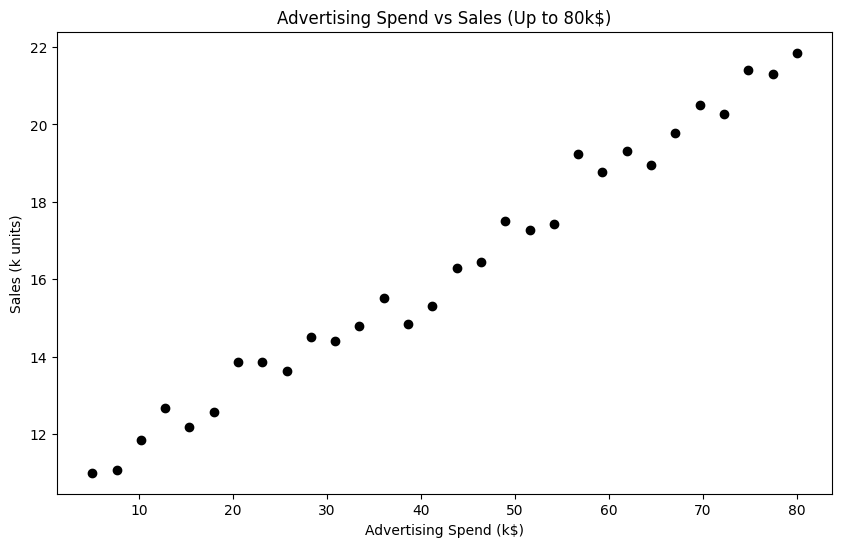

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# Generate dataset up to 80k$
# -----------------------------
X = np.linspace(5, 80, 30).reshape(-1, 1)  # 30 points from 5 to 80

# Rising trend until 80k$, with noise
y = (10 + 0.15 * X.ravel()) + np.random.normal(0, 0.5, X.shape[0])

# -----------------------------
# Plot dataset
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black')
plt.xlabel('Advertising Spend (k$)')
plt.ylabel('Sales (k units)')
plt.title('Advertising Spend vs Sales (Up to 80k$)')
plt.show()


## Step 2: Exploring Linear Regression with Different θ Values

In **linear regression**, we model the relationship between input $X$ (Advertising Spend) and output $y$ (Sales) as:

$$
\hat{y} = \theta_0 + \theta_1 X
$$

where:  
- $\theta_0$ is the **intercept** (baseline sales),  
- $\theta_1$ is the **slope** (change in sales per unit of advertising spend),  
- $\hat{y}$ is the **predicted sales**.  

To find the **best θ values**, we minimize the **Mean Squared Error (MSE)**:

$$
MSE(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} \big(y^{(i)} - (\theta_0 + \theta_1 X^{(i)})\big)^2
$$

- $m$ = number of data points  
- $y^{(i)}$ = actual sales for point $i$  
- $X^{(i)}$ = advertising spend for point $i$  

We can **manually try different values of $\theta_0$ and $\theta_1$** to see how the regression line fits the data:

- **Underfitting (high bias)** → slope too small, line too flat  
- **Good fit** → line closely follows the trend of the data  
- **Overfitting (high variance)** → slope too steep, line tries to fit noise  

This helps visualize how **different θ values affect the model** before finding the optimal solution.

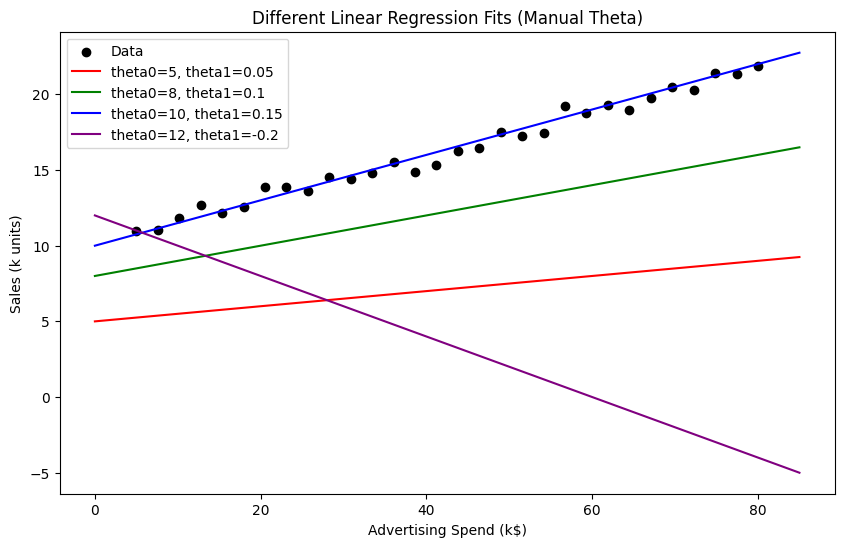

In [16]:
# Example theta values
thetas = [
    [5, 0.05],   # too flat → underfit
    [8, 0.1],    # closer
    [10, 0.15],  # almost perfect
    [12, -0.2]    # too steep
]

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', label='Data')

X_range = np.linspace(0, 85, 100)
colors = ['red', 'green', 'blue', 'purple']

for i, (theta0, theta1) in enumerate(thetas):
    y_pred = theta0 + theta1 * X_range
    plt.plot(X_range, y_pred, color=colors[i], label=f'theta0={theta0}, theta1={theta1}')

plt.xlabel('Advertising Spend (k$)')
plt.ylabel('Sales (k units)')
plt.title('Different Linear Regression Fits (Manual Theta)')
plt.legend()
plt.show()

## Step 3: Finding the Best θ using the Normal Equation

We want to find the **optimal θ₀ (intercept) and θ₁ (slope)** that minimize the **Mean Squared Error (MSE)**.

The **closed-form solution** (Normal Equation) is:

$$
\theta = (X^T X)^{-1} X^T y
$$

Where:  

- $X$ is the input matrix with a column of ones for the intercept:

$$
X = 
\begin{bmatrix}
1 & X^{(1)} \\
1 & X^{(2)} \\
\vdots & \vdots \\
1 & X^{(m)}
\end{bmatrix}
$$

- $y$ is the vector of actual sales: 

$$
y = 
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
$$

- $\theta = 
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix}$
gives the **best-fit line**:

$$
\hat{y} = \theta_0 + \theta_1 X
$$

Using this formula, we compute the **exact θ values** that minimize the error on the training data.

Best theta found: theta0 = 10.195, theta1 = 0.143


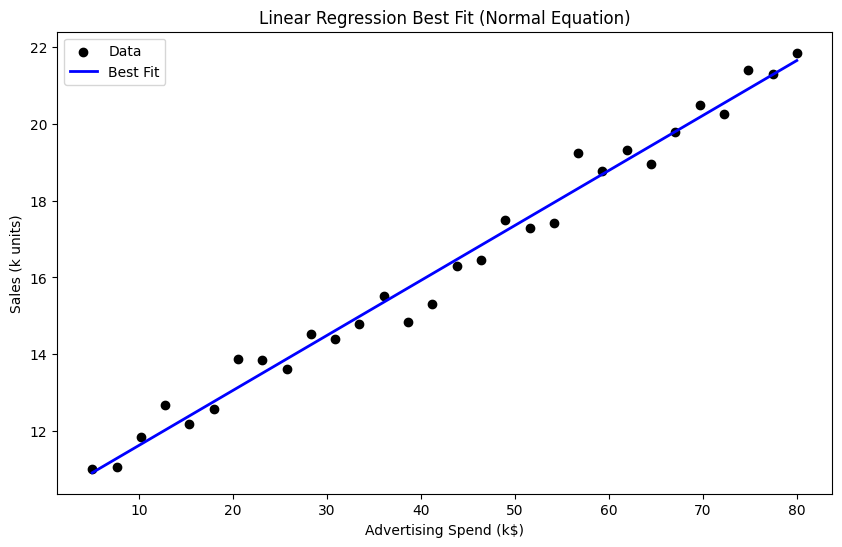

In [17]:
# Add bias term (column of ones)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape: (n_samples, 2)

# Closed-form solution: theta = (X_b^T X_b)^(-1) X_b^T y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"Best theta found: theta0 = {theta_best[0]:.3f}, theta1 = {theta_best[1]:.3f}")

# Plot best fit
y_best = X_b.dot(theta_best)
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_best, color='blue', linewidth=2, label='Best Fit')
plt.xlabel('Advertising Spend (k$)')
plt.ylabel('Sales (k units)')
plt.title('Linear Regression Best Fit (Normal Equation)')
plt.legend()
plt.show()

## Step X: Example – Load, Visualize, Train, and Predict

This example demonstrates how to:  

1. **Load and prepare the dataset**  
2. **Create a scatterplot** to visualize the data  
3. **Train a linear regression model** using scikit-learn  
4. **Make a prediction** for a specific advertising spend (e.g., 50k$)  

The code below shows the **end-to-end workflow**, from raw data to a fitted model and a prediction. This gives a concrete example of how linear regression works in practice.


Best theta found: intercept = 10.195, slope = 0.143
Predicted sales for $50k advertising spend: 17.35 k units


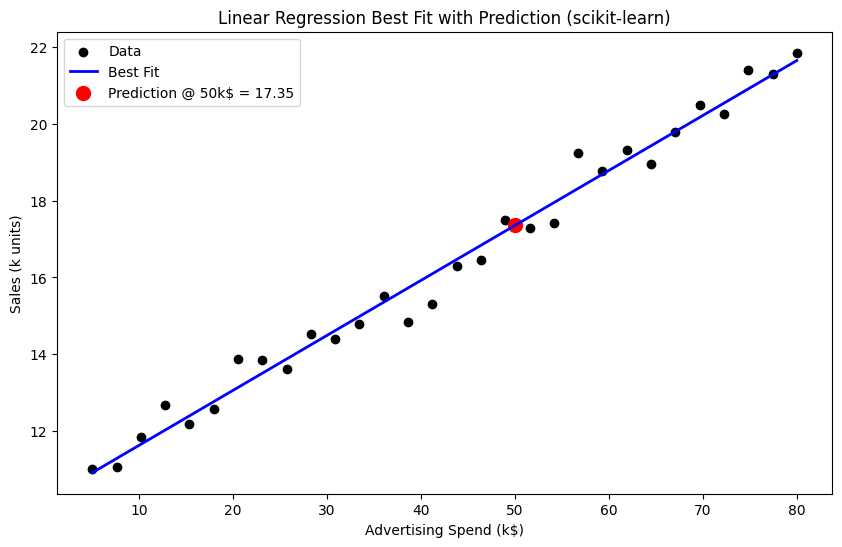

In [19]:
# -----------------------------
# Fit linear regression using scikit-learn
# -----------------------------
model = LinearRegression()
model.fit(X, y)

print(f"Best theta found: intercept = {model.intercept_:.3f}, slope = {model.coef_[0]:.3f}")

# -----------------------------
# Predict sales for 50k$
# -----------------------------
X_new = np.array([[50]])
y_pred_50k = model.predict(X_new)[0]
print(f"Predicted sales for $50k advertising spend: {y_pred_50k:.2f} k units")

# -----------------------------
# Plot dataset and best-fit line
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, model.predict(X), color='blue', linewidth=2, label='Best Fit')
plt.scatter(X_new, y_pred_50k, color='red', s=100, label=f'Prediction @ 50k$ = {y_pred_50k:.2f}')
plt.xlabel('Advertising Spend (k$)')
plt.ylabel('Sales (k units)')
plt.title('Linear Regression Best Fit with Prediction (scikit-learn)')
plt.legend()
plt.show()

## Step Z: Reflections on the Sales Prediction Model

If all went well, your linear regression model should make **good predictions** for sales based on advertising spend.  
If not, you may need to:  

- Include **additional relevant features** (e.g., seasonal trends, promotions, or market conditions)  
- Collect **more or higher-quality training data**  
- Consider a **more complex model**, such as Polynomial Regression, if the relationship is nonlinear  

### In summary:

- You **explored the sales data** and visualized how advertising spend relates to sales.  
- You **selected a linear regression model** to capture the trend.  
- You **trained the model** on the dataset (the algorithm found the best slope and intercept).  
- You **made predictions** for new advertising spends (e.g., predicting sales for \$50k), hoping the model generalizes well.  

This workflow demonstrates a **typical Machine Learning project** applied to sales prediction.

## Nonrepresentative Training Data and Plateaus

In order to generalize well, it is crucial that your **training data be representative** of the cases you want to predict.  
This is true whether you use **instance-based learning** or **model-based learning**.  

For example, in our sales vs. advertising spending dataset, the data **rises linearly up to 80k$**, and then **plateaus**, showing roughly constant sales for higher spends.  
If our training data did not include points near or beyond this plateau, the model would **fail to capture the plateau behavior** and might overestimate sales for higher advertising budgets.  

This illustrates that having **representative training data**, including regions where the trend changes or plateaus, is crucial for accurate predictions.

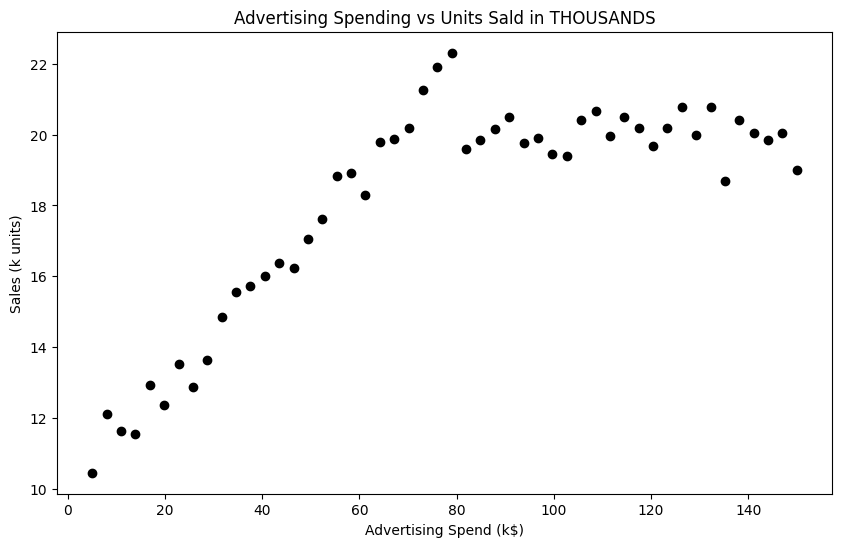

In [20]:
# -----------------------------
# Generate dataset with plateau and slight drop
# -----------------------------
X = np.linspace(5, 150, 50).reshape(-1, 1)

# Rising trend that plateaus at 80k$, then roughly constant
y = (10 + 0.15 * X.ravel() * (X.ravel() < 80) +  # Linear rise until 80k
     10 * (X.ravel() >= 80) +                    # Plateau after 80k
     np.random.normal(0, 0.5, X.shape[0]))      # Noise

# Plot dataset
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black')
plt.xlabel('Advertising Spend (k$)')
plt.ylabel('Sales (k units)')
plt.title('Advertising Spending vs Units Sald in THOUSANDS')
plt.show()

Predicted sales for $50k advertising spend: 25.95 k units


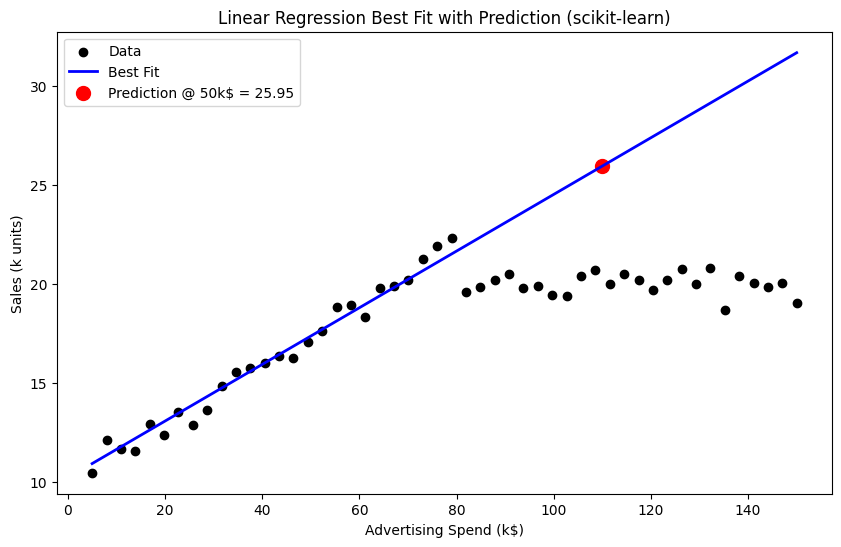

In [25]:
# -----------------------------
# Predict sales for 110$
# -----------------------------
X_new = np.array([[110]])
y_pred_50k = model.predict(X_new)[0]
print(f"Predicted sales for $50k advertising spend: {y_pred_50k:.2f} k units")

# -----------------------------
# Plot dataset and best-fit line
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, model.predict(X), color='blue', linewidth=2, label='Best Fit')
plt.scatter(X_new, y_pred_50k, color='red', s=100, label=f'Prediction @ 50k$ = {y_pred_50k:.2f}')
plt.xlabel('Advertising Spend (k$)')
plt.ylabel('Sales (k units)')
plt.title('Linear Regression Best Fit with Prediction (scikit-learn)')
plt.legend()
plt.show()

In [21]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

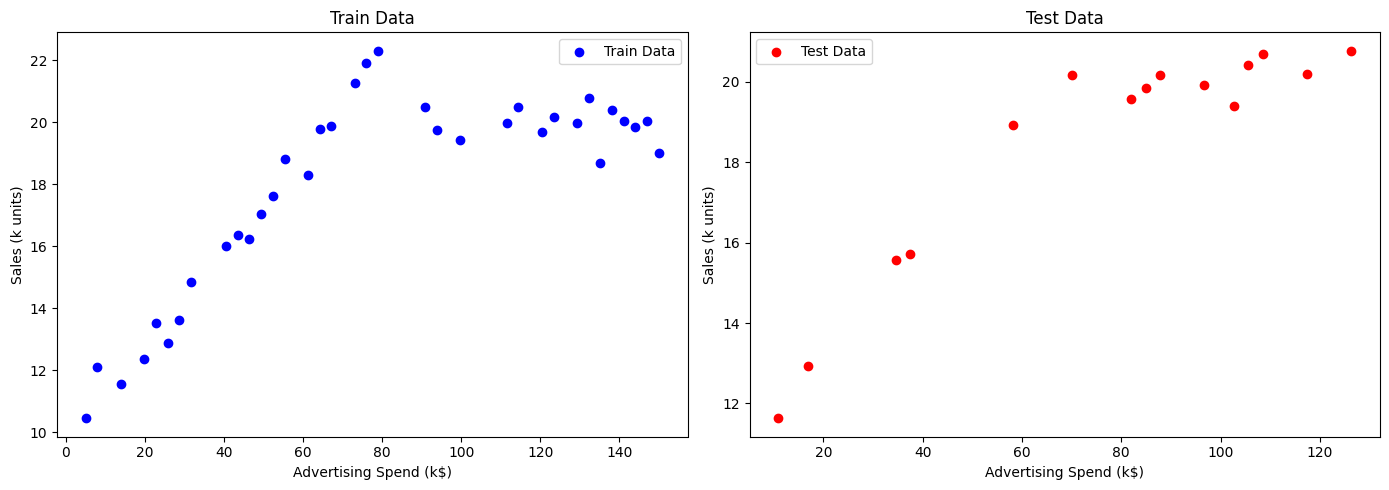

In [22]:
# -----------------------------
# Plot train vs test side by side
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Train data
axes[0].scatter(X_train, y_train, color='blue', label='Train Data')
axes[0].set_title('Train Data')
axes[0].set_xlabel('Advertising Spend (k$)')
axes[0].set_ylabel('Sales (k units)')
axes[0].legend()

# Right: Test data
axes[1].scatter(X_test, y_test, color='red', label='Test Data')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Advertising Spend (k$)')
axes[1].set_ylabel('Sales (k units)')
axes[1].legend()

plt.tight_layout()
plt.show()

Degree 1 - Train MSE: 3.912, RMSE: 1.978
Degree 1 - Test MSE:  2.113, RMSE:  1.454



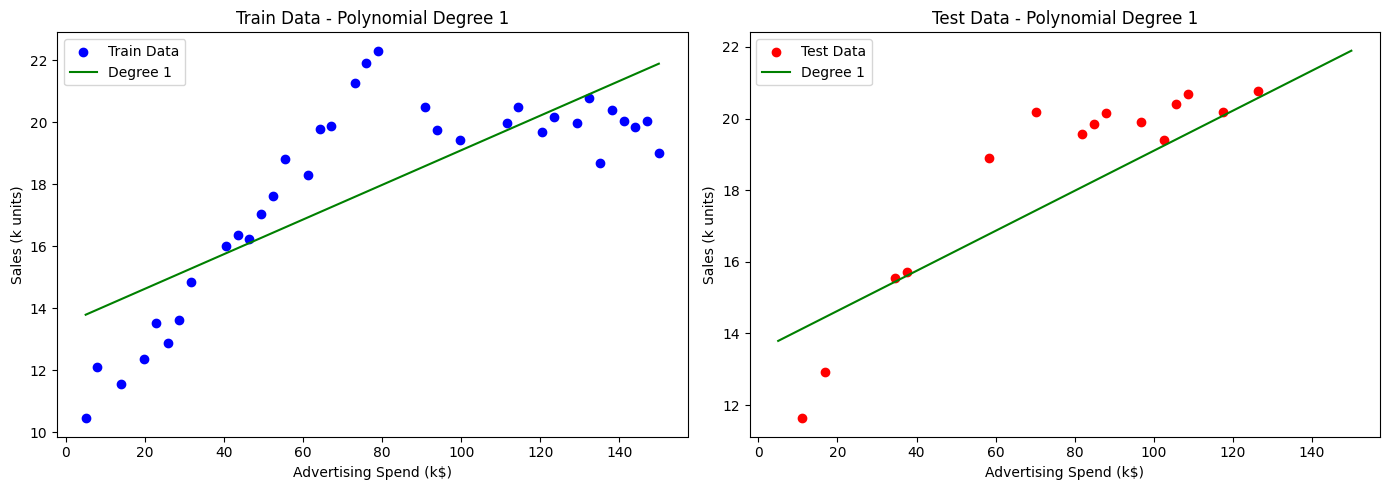

Degree 4 - Train MSE: 0.527, RMSE: 0.726
Degree 4 - Test MSE:  0.602, RMSE:  0.776



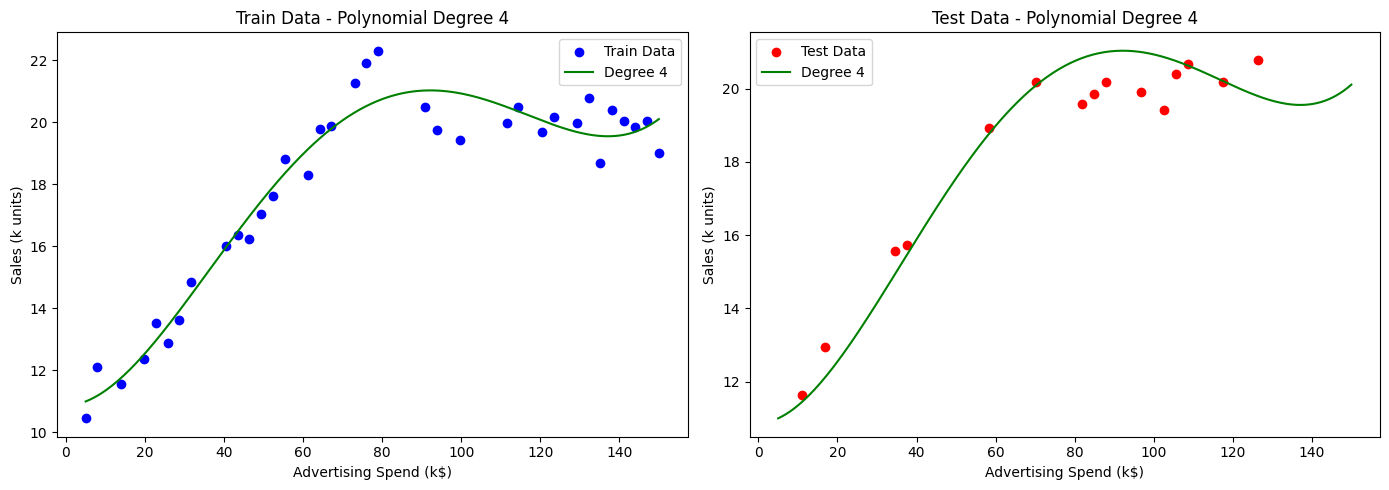

Degree 10 - Train MSE: 0.989, RMSE: 0.994
Degree 10 - Test MSE:  1.734, RMSE:  1.317



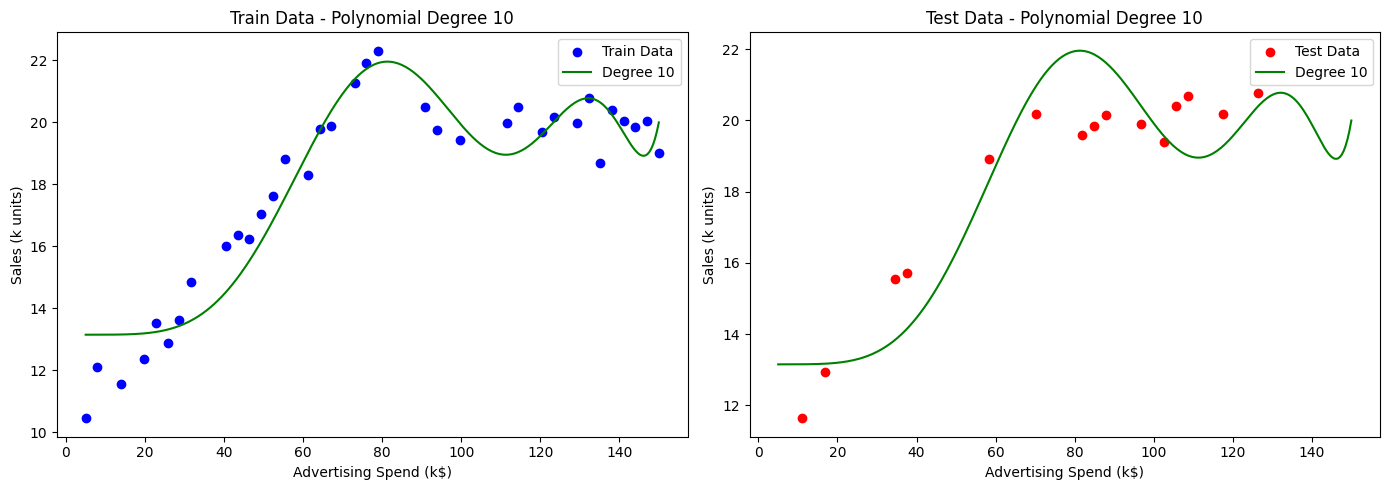

In [30]:
# Plot different polynomial fits
for degree in [1, 4, 10]:
    plot_train_test_polynomial_with_error(X_train, y_train, X_test, y_test, degree)